In [1]:
import lightgbm as lgb

In [49]:
import pandas as pd
import numpy as np

In [31]:
from sklearn.compose import ColumnTransformer

In [32]:
from src.utils.functions import load_pickle

In [118]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

In [121]:
ev_hist = pd.read_csv('../reports/lgbm_regressor_eval.csv', index_col=0)

In [122]:
ev_hist

,l2-mean,l2-stdv
0,0.097503,0.002509
1,0.097402,0.002506
2,0.097301,0.002504
3,0.097201,0.002501
4,0.097101,0.002498
...,...,...
6109,0.043544,0.001306
6110,0.043544,0.001306
6111,0.043544,0.001306
6112,0.043544,0.001306


<AxesSubplot: >

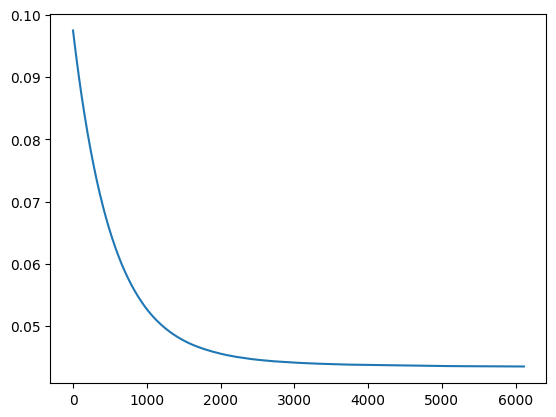

In [123]:
ev_hist['l2-mean'].plot()

In [124]:
(10**0.043519)**0.5

1.0513794883615641

In [125]:
model = lgb.Booster(model_file='../models/lgbm_regressor.txt')

In [126]:
model.feature_name()

['host_is_superhost',
 'neighbourhood_group_cleansed',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'number_of_reviews']

In [107]:
model.num_feature()

9

In [127]:
df = pd.read_csv('../data/processed/test.csv')
df.shape

(2846, 10)

In [128]:
df.head()

,neighbourhood_group_cleansed,property_type,room_type,bathrooms_text,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,price
0,8.0,11.0,0.0,2.0,-0.470141,0.900114,1.540581,1.089246,0.584890,1.908485
1,1.0,11.0,0.0,2.0,-0.470141,0.900114,0.384022,0.440774,-0.380976,2.093422
2,1.0,11.0,0.0,2.0,2.127020,0.352152,0.384022,0.440774,1.043677,1.903090
3,1.0,11.0,0.0,2.0,2.127020,0.352152,0.384022,0.440774,2.335523,2.149219
4,1.0,27.0,2.0,3.0,-0.470141,-0.195810,0.384022,-0.207699,0.645257,1.812913


In [72]:
categorical_features = pd.read_csv(
        '../data/processed/categorical_feature_names.csv'
    ).categorical.to_list()

In [73]:
categorical_features

['neighbourhood_group_cleansed',
 'property_type',
 'room_type',
 'bathrooms_text']

In [129]:
features = df.drop('price', axis=1)
features.shape

(2846, 9)

In [130]:
target = df.price

In [131]:
preds = model.predict(features.values)

In [132]:
r2_score(target, preds)

0.06815713544941304

In [133]:
mean_absolute_error(10**target, 10**preds)

51.07827007833269

In [134]:
mean_absolute_percentage_error(10**target, 10**preds)

0.550835701588401

In [135]:
mean_squared_error(10**target, 10**preds)**0.5

90.39704716945093

## API

In [142]:
import requests

In [160]:
url = "http://localhost:8000/predict"
headers = {"content-type": "application/json"}

In [161]:
raw_df = pd.read_csv('../data/raw/test.csv')

In [201]:
payload = {
    'data': [raw_df.columns.to_list()] + raw_df[:5].values.tolist()
}

In [228]:
payload['data'][5][4] = 10

In [203]:
payload['data']

[['host_is_superhost',
  'neighbourhood_group_cleansed',
  'property_type',
  'room_type',
  'accommodates',
  'bathrooms_text',
  'bedrooms',
  'beds',
  'number_of_reviews',
  'price'],
 ['f',
  'Sants-Montjuïc',
  'Entire rental unit',
  'Entire home/apt',
  10,
  '1 bath',
  3.0,
  4.0,
  93,
  '$81.00'],
 ['f',
  'Eixample',
  'Entire rental unit',
  'Entire home/apt',
  5,
  '1 bath',
  2.0,
  3.0,
  13,
  '$124.00'],
 ['t',
  'Eixample',
  'Entire rental unit',
  'Entire home/apt',
  4,
  '1 bath',
  2.0,
  3.0,
  131,
  '$80.00'],
 ['t',
  'Eixample',
  'Entire rental unit',
  'Entire home/apt',
  4,
  '1 bath',
  2.0,
  3.0,
  238,
  '$141.00'],
 ['f',
  'Eixample',
  'Private room in home',
  'Private room',
  3,
  '1 private bath',
  2.0,
  2.0,
  98,
  '$65.00']]

In [229]:
response = requests.post(url, json=payload, headers=headers)

In [230]:
response.status_code

200

In [231]:
response.text

'{"data":[-1.0,-1.0,-1.0,-1.0,-1.0]}'

In [215]:
raw_df.price[:5]

0     $81.00
1    $124.00
2     $80.00
3    $141.00
4     $65.00
Name: price, dtype: object